# DLTHON

## DKTC (Dataset of Korean Threatening Conversations)

- 텍스트 다중분류 프로젝트

## 데이터셋 정보

train.csv

    1. idx = 인덱스
    2. class = 0~4
        class 0; 협박 대화
        class 1; 갈취 대화
        class 2; 직장 내 괴롭힘 대화
        class 3; 기타 괴롭힘 대화
    3. conversation = \n으로 구분된 멀티턴 텍스트 대화

test.json

    1. t_### = 인덱스
    2. text = 대화

submission.csv

    1. file_name = 인덱스
    2. class = 예측값

## 평가기준
> - 데이터 EDA와 데이터 전처리가 적절하게 이뤄졌는가?
> - Task에 알맞게 적절한 모델을 찾아보고 선정했는가?
> - 성능향상을 위해 논리적으로 접근했는가?
> - 결과 도출을 위해 여러가지 시도를 진행했는가?
> - 도출된 결론에 충분한 설득력이 있는가?
> - 적절한 metric을 설정하고 그 사용 근거 및 결과를 분석하였는가?
> - 발표가 매끄럽게 진행되었고 발표시간을 준수하였는지? (발표 10분-15분)

## TO-DO-LIST
- 일반 대화 데이터셋 만들어야함 (800-1000개정도)
- ppt 제작
- 평가지표 : f1-score

## EDA


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import os
import pandas as pd

train_data_path ="./data/train.csv"
train_data = pd.read_csv(train_data_path)
train_data.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [14]:
train_data.shape

(3950, 3)

## 데이터 전처리

In [15]:
!pip install soynlp

In [16]:
import re
# import emoji
from soynlp.normalizer import repeat_normalize

In [17]:
def clean(x):
    # emojis = ''.join(emoji.UNICODE_EMOJI.keys())
    pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-힣]+')
    url_pattern = re.compile(
        r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')
    x = pattern.sub(' ', x)
    x = url_pattern.sub('', x)
    x = x.strip()
    x = repeat_normalize(x, num_repeats=2)
    return x

In [18]:
train_data['cleaned'] = train_data.conversation.apply(lambda x: clean(x))

In [19]:
train_data['cleaned']

0       지금 너 스스로를 죽여달라고 애원하는 것인가? 아닙니다. 죄송합니다. 죽을 거면 혼...
1       길동경찰서입니다. 9시 40분 마트에 폭발물을 설치할거다. 네? 똑바로 들어 한번만...
2       너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어. 그만해. 니들 놀리는거 재미없...
3       어이 거기 예?? 너 말이야 너. 이리 오라고 무슨 일. 너 옷 좋아보인다? 얘 돈...
4       저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
                              ...                        
3945    준하야 넌 대가리가 왜이렇게 크냐? 내 머리가 뭐. 밥먹으면 대가리만 크냐 너는? ...
3946    내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내 예.? ...
3947    나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지. 왜 그래. 들리겠어....
3948    누구맘대로 여기서 장사하래? 이게 무슨일입니까? 남의 구역에서 장사하려면 자릿세를 ...
3949    희정씨 네? 주말에 시간이 넘쳐나나봐 갑자기 왜그러세요? 손이 빤짝빤짝 네일했니? ...
Name: cleaned, Length: 3950, dtype: object

### 한국어 문장 분리기

In [20]:
!pip install kss

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.5 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 43.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 24.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached PyYAML-6.0.tar.gz (124 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [48 lines of output]
      running egg_info
      writing lib/PyYAML.egg-info/PKG-INFO
      writing dependency_links to lib/PyYAML.egg-info/dependency_links.txt
      writing top-level names to lib/PyYAML.egg-info/top_level.txt
     

In [21]:
samples = train_data.sample(5)

In [22]:
samples

,idx,class,conversation,cleaned
2970,2970,갈취 대화,혹시 만원 있어요?\n누구세요?\n그건 알거 없고 돈 좀 있냐고요. 나 만원만 좀 ...,혹시 만원 있어요? 누구세요? 그건 알거 없고 돈 좀 있냐고요. 나 만원만 좀 빌려...
2217,2217,협박 대화,뭐하자는 거야?\n죄송합니다.\n뭐가 죄송해? 말해봐 뭐가 죄송해?\n죄송합니다.\...,뭐하자는 거야? 죄송합니다. 뭐가 죄송해? 말해봐 뭐가 죄송해? 죄송합니다. 죄송할...
2028,2028,갈취 대화,야 너 돈 많이 있어 보이네 \n네 저 많이 없어요 왜 그러세요\n시끄러 옷차림 보...,야 너 돈 많이 있어 보이네 네 저 많이 없어요 왜 그러세요 시끄러 옷차림 보니 고...
78,78,기타 괴롭힘 대화,여기 서비스좀 주세요\n네? 오천원어치 사셔서 제가 남는게 없어요 죄송해요\n저기 ...,여기 서비스좀 주세요 네? 오천원어치 사셔서 제가 남는게 없어요 죄송해요 저기 나 ...
3022,3022,직장 내 괴롭힘 대화,어제 맛있게 드셨죠? \n네! 너무 맛있었어요! 덕분에! \n네 잘 먹었습니다. \...,어제 맛있게 드셨죠? 네! 너무 맛있었어요! 덕분에! 네 잘 먹었습니다. 길동님. ...


In [23]:
samples.cleaned.iloc[0]

'혹시 만원 있어요? 누구세요? 그건 알거 없고 돈 좀 있냐고요. 나 만원만 좀 빌려줘요. 아니 당신이 누군줄 알고 돈을 빌려줘요? 내가 지금 차비가 없어서 그래. 만원만 좀 빌려줘. 싫어요 다른 사람한테 부탁하세요. 당신 방금 지갑에 현금 많은거 봤어! 만원만 빌려주는게 그렇게 어려운 건가! 제가 현금이 많고 적고가 무슨 상관이에요? 좋게 말할때 주는 게 좋을거야. 나 안 참아. 으악! 진정하세요! 빨리 내놔! 알겠어요. 알겠다고요.'

In [24]:
# from kss import split_sentences

# split_sentences(samples.cleaned.iloc[0])

In [25]:
# split_sentences(samples.cleaned.iloc[2])

In [26]:
# split_sentences(samples.cleaned.iloc[-1])

## BERT

In [27]:
!pip install -U transformers

In [28]:
#from transformers import TFElectraModel, ElectraTokenizer

# model = TFElectraModel.from_pretrained("monologg/koelectra-base-v3-discriminator", from_pt=True)
#tokenizer = ElectraTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")

In [29]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder를 객체로 생성
encoder = LabelEncoder()

# fit, transform 메소드를 통한 레이블 인코딩
encoder.fit(train_data['class'])

train_data["label"] = encoder.transform(train_data['class'])

In [41]:
dataset = train_data[['cleaned', 'label']]

In [42]:
dataset.sample(n=10)

,cleaned,label
1818,이번주부터 프로젝트 진행하는 거 알지? 다들 자기 맡은 일 체크하고 팀장님 제 이름...,2
1535,얘들아. 이 년 몰골좀 봐. 야. 너 좀 씻고다녀. 우웩 너희가 나한테 걸레물 뿌린...,1
2670,김과장 저녁에 머해 왜요? 월급날인데 데이트하자 사장님 이런거도 성폭력입니다. 데이...,2
3036,칼 내려 놓으세요 너가 나 무시하고 있잖아 선생님 진정하시고 제 말좀 들어보세요 너...,3
1784,이야 이 엉덩이 짱 크네. 오우 그러게 한 대 때려봐도 되냐? 그만해 그런 장난 안...,1
927,야 너 오늘 옷 머냐 내옷???? 새로샀어 야 그몸뚱이에 그게 어울리냐 내몸이어때서...,1
2153,자 다같이 열심히 하자 근데 넌 할수있나? 뭐가? 아니 넌 너무 못생기고 말도 잘 ...,1
1240,님 롤 나 못하네요 니새보다는 잘하는 것 같은데요 스킬 못 맞추는 꼬라지 라고 01...,1
3613,야 우리 쟤 죽여버리자 죽이는건 너무 심하지. 그냥 불구로 만들어버리자 왜그러세요....,3
1495,야! 너 그거 당장 내놔!! 절대 못 줘 이게 얼마나 중요한 증거인데!! 그것만 주...,3


In [43]:
max_seq_len = 0
len_64_128 = 0
len_128_256 = 0

mylist = [0 for i in range(10000)]
for index, value in dataset['cleaned'].items():
    mylist[len(value)] += 1
    max_seq_len = max(max_seq_len, len(value))

    if len(value) >= 64 and len(value) < 128:
        len_64_128 += 1
    elif len(value) >= 128 and len(value) < 256:
        len_128_256 += 1

print(f'가장 긴 문장 길이: {max_seq_len}')
print(f'64과 128 사이 길이 문장 개수: {len_64_128}')
print(f'128과 256 사이 길이 문장 개수: {len_128_256}')

가장 긴 문장 길이: 874
64과 128 사이 길이 문장 개수: 462
128과 256 사이 길이 문장 개수: 2344


In [44]:
max_seq_len = 800

In [48]:
dataset

,cleaned,label
0,지금 너 스스로를 죽여달라고 애원하는 것인가? 아닙니다. 죄송합니다. 죽을 거면 혼...,3
1,길동경찰서입니다. 9시 40분 마트에 폭발물을 설치할거다. 네? 똑바로 들어 한번만...,3
2,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어. 그만해. 니들 놀리는거 재미없...,1
3,어이 거기 예?? 너 말이야 너. 이리 오라고 무슨 일. 너 옷 좋아보인다? 얘 돈...,0
4,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,0
...,...,...
3945,준하야 넌 대가리가 왜이렇게 크냐? 내 머리가 뭐. 밥먹으면 대가리만 크냐 너는? ...,1
3946,내가 지금 너 아들 김길준 데리고 있어. 살리고 싶으면 계좌에 1억만 보내 예.? ...,0
3947,나는 씨 같은 사람 보면 참 신기하더라. 어떻게 저렇게 살지. 왜 그래. 들리겠어....,2
3948,누구맘대로 여기서 장사하래? 이게 무슨일입니까? 남의 구역에서 장사하려면 자릿세를 ...,0


In [55]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import ElectraTokenizer, ElectraModel, ElectraConfig, AdamW
import torch.nn as nn
import wandb
from sklearn.metrics import f1_score

# wandb.login(key ='41f703d2a27233965949ceec062860a34d822ed9')
# W&B 초기화
wandb.init(project="koelectra-multi-label-classification2", entity="seongyeonkim")

# 데이터 로드
df = train_data[['cleaned', 'label']]

# KoElectra tokenizer 로드
tokenizer = ElectraTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")

# 토큰화 및 레이블 변환 함수 정의
label_map = {
    0: [1, 0, 0, 0],
    1: [0, 1, 0, 0],
    2: [0, 0, 1, 0],
    3: [0, 0, 0, 1],
    4: [0, 0, 0, 0]  # 기타 경우 추가
}

In [ ]:
class ViolenceDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length):
        self.dataframe = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        text = self.dataframe.iloc[idx, 0]
        labels = self.dataframe.iloc[idx, 1]
        labels = label_map[labels]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        input_ids = encoding['input_ids'].flatten()
        attention_mask = encoding['attention_mask'].flatten()
        
        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': torch.tensor(labels, dtype=torch.float)
        }

# 데이터셋 준비
max_length = 128
dataset = ViolenceDataset(df, tokenizer, max_length)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# 모델 정의
class ElectraForMultiLabelClassification(nn.Module):
    def __init__(self, model_name, num_labels):
        super(ElectraForMultiLabelClassification, self).__init__()
        self.electra = ElectraModel.from_pretrained(model_name)
        self.classifier = nn.Linear(self.electra.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.electra(input_ids=input_ids, attention_mask=attention_mask)
        sequence_output = outputs.last_hidden_state
        pooled_output = sequence_output[:, 0, :]  # cls token
        logits = self.classifier(pooled_output)
        return logits

model = ElectraForMultiLabelClassification("monologg/koelectra-base-v3-discriminator", num_labels=4)
criterion = nn.BCEWithLogitsLoss()
optimizer = AdamW(model.parameters(), lr=1e-5)

# W&B에 모델을 로깅할 수 있도록 W&B에 등록
wandb.watch(model, log="all")

# 학습 루프
model.train()
for epoch in range(3):
    all_preds = []
    all_labels = []
    for batch in dataloader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        preds = torch.sigmoid(outputs).detach().cpu().numpy()
        labels = labels.detach().cpu().numpy()
        
        all_preds.append(preds)
        all_labels.append(labels)
        
        wandb.log({"epoch": epoch + 1, "loss": loss.item()})
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")
    
    # 에포크당 F1 스코어 계산
    all_preds = np.concatenate(all_preds, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)
    f1 = f1_score(all_labels, (all_preds > 0.5).astype(int), average='micro')
    
    wandb.log({"epoch": epoch + 1, "f1_score": f1})
    print(f"Epoch {epoch+1}, F1 Score: {f1}")

In [57]:
# 모델 저장
model_save_path = './koelectra_multilabel'
torch.save(model.state_dict(), model_save_path + '/pytorch_model.bin')
tokenizer.save_pretrained(model_save_path)

# W&B에 모델 아티팩트로 업로드
artifact = wandb.Artifact('koelectra-multi-label-classification', type='model')
artifact.add_dir(model_save_path)
wandb.log_artifact(artifact)

# W&B 실행 종료
wandb.finish()

wandb: Adding directory to artifact (./koelectra_multilabel)... Done. 1.8s


epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▅▅▅▅▅▅▅▅▅▅▅▅▅▅█████████████
loss,█▇▇▇▇▆▅▅▄▅▄▃▄▂▂▃▂▃▃▃▁▃▃▃▂▃▂▂▃▂▁▂▁▁▂▄▄▂▁▂
epoch,3
loss,0.06351


## Fine-tuning Model

## Predict

일반대화 예시

```json
{
	"id": {
		"text": "이거 들어봐 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 요즘 듣는 것도 들어봐 음 난 좀 별론데 좋을 줄 알았는데 아쉽네 내 취향은 아닌 듯 배고프다 밥이나 먹으러 가자 그래"
	}
}
```

In [61]:
import json
with open('./data/test.json') as f:
    test_data = json.load(f)

test_data = pd.DataFrame(test_data).T
test_data.reset_index(drop=True, inplace=True)

In [62]:
test_data

,text
0,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
1,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...
2,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
3,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...
4,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...
...,...
495,미나씨 휴가 결제 올리기 전에 저랑 상의하라고 말한거 기억해요? 네 합니다. 보고서...
496,교수님 제 논문에 제 이름이 없나요? 아 무슨 논문말이야? 지난 번 냈던 논문이...
497,야 너 네 저요? 그래 너 왜요 돈좀 줘봐 돈 없어요 돈이 왜 없어 지갑은 폼이...
498,야 너 빨리 안 뛰어와? 너 이 환자 제대로 봤어 안 봤어 어제 저녁부터 계속 보다...


In [69]:
# 예측 함수
def predict(text):
    try:
        model.eval()
        with torch.no_grad():
            encoding = tokenizer.encode_plus(
                text,
                add_special_tokens=True,
                max_length=128,
                padding='max_length',
                truncation=True,
                return_tensors='pt'
            )
            input_ids = encoding['input_ids']
            attention_mask = encoding['attention_mask']
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            probs = torch.sigmoid(outputs)
        return probs
    except:
        print(text)
        return torch.zeros([1, 4])

In [70]:
print(encoder.classes_)

['갈취 대화' '기타 괴롭힘 대화' '직장 내 괴롭힘 대화' '협박 대화']


In [71]:
text = test_data.text.iloc[2]
print(text)
predict(text)

너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 행실이 맘에 안들어 네 실천할께요 옆에 동기들 좀 본받으란 말야 어? 네 알겠습니다 그래 똑바로해 노럭할께요


tensor([[0.0214, 0.0489, 0.9169, 0.0485]])

In [72]:
from tqdm import tqdm, trange

tqdm.pandas()

In [73]:
test_data['pred'] = test_data['text'].progress_apply(lambda x: predict(x))

100%|██████████| 500/500 [00:34<00:00, 14.66it/s]


In [78]:
pred_dict = test_data.pred.to_dict()

In [79]:
pred_dict 

{0: tensor([[0.9123, 0.0904, 0.0193, 0.0350]]),
 1: tensor([[0.0309, 0.0223, 0.9573, 0.0492]]),
 2: tensor([[0.0214, 0.0489, 0.9169, 0.0485]]),
 3: tensor([[0.0377, 0.9185, 0.0298, 0.0458]]),
 4: tensor([[0.0300, 0.7538, 0.0385, 0.0742]]),
 5: tensor([[0.0808, 0.0457, 0.0162, 0.8911]]),
 6: tensor([[0.0554, 0.0286, 0.0319, 0.9531]]),
 7: tensor([[0.2115, 0.8407, 0.0137, 0.0303]]),
 8: tensor([[0.0324, 0.9226, 0.0468, 0.0437]]),
 9: tensor([[0.9261, 0.0670, 0.0259, 0.0317]]),
 10: tensor([[0.0413, 0.0388, 0.0243, 0.9423]]),
 11: tensor([[0.0261, 0.9368, 0.0554, 0.0390]]),
 12: tensor([[0.0282, 0.0254, 0.9572, 0.0453]]),
 13: tensor([[0.0339, 0.0314, 0.9593, 0.0367]]),
 14: tensor([[0.0314, 0.0272, 0.9662, 0.0350]]),
 15: tensor([[0.1302, 0.0359, 0.0157, 0.8489]]),
 16: tensor([[0.0250, 0.6617, 0.0221, 0.2029]]),
 17: tensor([[0.0167, 0.8693, 0.1461, 0.0335]]),
 18: tensor([[0.0783, 0.0281, 0.0213, 0.9313]]),
 19: tensor([[0.0320, 0.9263, 0.0447, 0.0360]]),
 20: tensor([[0.0493, 0.0328, 

In [94]:
# 데이터프레임으로 변환
pred_df = pd.DataFrame({k: v.numpy().flatten() for k, v in pred_dict.items()}).T

# 열 이름 지정
pred_df.columns = encoder.classes_

In [95]:
pred_df

,갈취 대화,기타 괴롭힘 대화,직장 내 괴롭힘 대화,협박 대화
0,0.912327,0.090432,0.019308,0.035047
1,0.030882,0.022269,0.957312,0.049211
2,0.021364,0.048918,0.916913,0.048465
3,0.037729,0.918511,0.029835,0.045829
4,0.030002,0.753776,0.038451,0.074196
...,...,...,...,...
495,0.033309,0.024554,0.965784,0.038516
496,0.074568,0.067026,0.283243,0.044703
497,0.916953,0.086230,0.025130,0.029461
498,0.037958,0.024057,0.145475,0.743308


In [101]:
pred_df = pred_df.astype('float')

In [104]:
pred_df['max_val'] = pred_df.max(axis=1)

In [106]:
import numpy as np

In [109]:
pred_df

,갈취 대화,기타 괴롭힘 대화,직장 내 괴롭힘 대화,협박 대화,max_val
0,0.912327,0.090432,0.019308,0.035047,0.912327
1,0.030882,0.022269,0.957312,0.049211,0.957312
2,0.021364,0.048918,0.916913,0.048465,0.916913
3,0.037729,0.918511,0.029835,0.045829,0.918511
4,0.030002,0.753776,0.038451,0.074196,0.753776
...,...,...,...,...,...
495,0.033309,0.024554,0.965784,0.038516,0.965784
496,0.074568,0.067026,0.283243,0.044703,0.283243
497,0.916953,0.086230,0.025130,0.029461,0.916953
498,0.037958,0.024057,0.145475,0.743308,0.743308


In [113]:
pred_df['label'] = pred_df.iloc[:,:4].progress_apply(lambda x : pred_df.columns[np.argmax(x)], axis=1 )

100%|██████████| 500/500 [00:00<00:00, 32241.06it/s]


In [114]:
pred_df

,갈취 대화,기타 괴롭힘 대화,직장 내 괴롭힘 대화,협박 대화,max_val,label
0,0.912327,0.090432,0.019308,0.035047,0.912327,갈취 대화
1,0.030882,0.022269,0.957312,0.049211,0.957312,직장 내 괴롭힘 대화
2,0.021364,0.048918,0.916913,0.048465,0.916913,직장 내 괴롭힘 대화
3,0.037729,0.918511,0.029835,0.045829,0.918511,기타 괴롭힘 대화
4,0.030002,0.753776,0.038451,0.074196,0.753776,기타 괴롭힘 대화
...,...,...,...,...,...,...
495,0.033309,0.024554,0.965784,0.038516,0.965784,직장 내 괴롭힘 대화
496,0.074568,0.067026,0.283243,0.044703,0.283243,직장 내 괴롭힘 대화
497,0.916953,0.086230,0.025130,0.029461,0.916953,갈취 대화
498,0.037958,0.024057,0.145475,0.743308,0.743308,협박 대화


<AxesSubplot: >

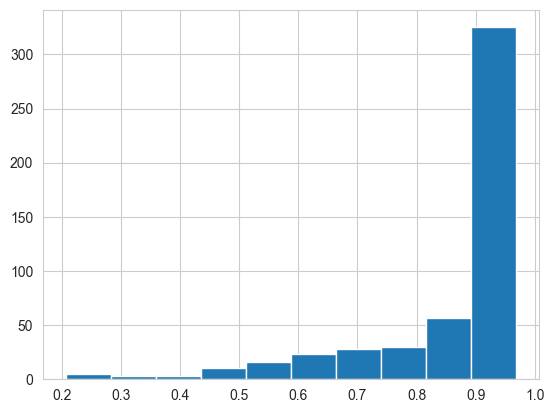

In [116]:
pred_df.max_val.hist()

In [123]:
pred_df[pred_df.max_val < 0.4]

,갈취 대화,기타 괴롭힘 대화,직장 내 괴롭힘 대화,협박 대화,max_val,label
77,0.030591,0.206497,0.150329,0.065126,0.206497,기타 괴롭힘 대화
82,0.191998,0.241525,0.046395,0.103002,0.241525,기타 괴롭힘 대화
152,0.239190,0.181527,0.017762,0.180304,0.239190,갈취 대화
300,0.074848,0.031678,0.247143,0.336920,0.336920,협박 대화
397,0.104743,0.381808,0.019580,0.096906,0.381808,기타 괴롭힘 대화
415,0.035841,0.340277,0.100390,0.324129,0.340277,기타 괴롭힘 대화
480,0.266200,0.206832,0.015270,0.162208,0.266200,갈취 대화
488,0.095094,0.318152,0.013105,0.397349,0.397349,협박 대화
491,0.165507,0.280934,0.039588,0.092551,0.280934,기타 괴롭힘 대화
496,0.074568,0.067026,0.283243,0.044703,0.283243,직장 내 괴롭힘 대화


### 확신하지 못하는 데이터 -> 일반 데이터가 아닐까?

In [124]:
test_data.iloc[77].text

'안녕 얘들아 이번 반장은 내가 맡게 되었어. 모두들 잘 부탁해. 우와 축하해! 우리반을 위해 열심히 일을 해줘! 아 그런데 이번에 반장되고 반장으로서 너희들에게 할 말이 있어. 우리에게 할 말이 있다고? 뭔데? 벌써부터 일 하려는거야? 무리하지 마 이제 앞으로 아침마다 등교시간은 8시며 지각할 때마다 벌금을 오천원 씩 걷어 들이려고 해. 뭔소리야 우리 학교 원래 지정된 등교시간은 9시잖아. 아무리 반장이어도 교칙을 바꿔서는 안 돼. 더욱이 벌금같은 돈이 오가서는 안되고. 내가 반장이잖아. 너가 반장이야? 그럼 뭐 반장은 아무 재정도 없이 일을 해야해? 지각을 안하면 되는거잖아. 애초에 돈을 걷을 생각이면 그 돈을 어디에다 어떻게 쓸건지 말해줘야 하는게 먼저 아닐까? 일단 지각비로 걷은 오천원 중 삼천원은 반의 발전을 위해 쓸거고 이천원은 그래도 내가 반을 위해 일 하는데 수고금 같은건 가져가야지. 야 무슨 학교에서 반장 하나 하는데 돈이 필요해. 너 도둑놈심보다. 그럼 너가 반장하던지 그럴 용기도 없으면서 말이 많네? 어쨌든 내일부터 지각하면 오천원이야. 지각할 마음 있으면 오천원씩 들고와.'

In [125]:
test_data.iloc[82].text

'천안 두정동 제이빌라 인데요, 지금 화재가 발생했어요. 빌라 어디에 불이 났나요? 1층 주차장에서 불이 나고 있어요. 그러면 지금 다친 사람도 있나요? 아직까지는 없는거 같아요. 알겠습니다. 지금 119 소방대를 보내도록 하겠습니다.'

In [127]:
pred_df.to_csv('pred_koelectra.csv', index=False)